In [11]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [12]:
import yfinance as yf

# Download TSLA data from 2018-01-01 to 2025-04-30
df_googl = yf.download(
    "GOOGL", 
    start="2018-07-25", 
    end="2020-06-10"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_googl.reset_index(inplace=True)



[*********************100%***********************]  1 of 1 completed


In [13]:



# Save the DataFrame as a CSV file in the correct folder
df_googl.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\GOOGL_historical_data.csv", index=False)


In [14]:
print("Null values count per column:")
print(df_googl.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64


In [15]:
df_googl.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,472,472.000000,472.000000,472.000000,472.000000,4.720000e+02
mean,2019-07-02 02:08:08.135593216,60.427036,61.019826,59.770228,60.398485,3.639782e+07
min,2018-07-25 00:00:00,48.999237,50.365204,48.650403,48.981819,1.280200e+07
25%,2019-01-13 06:00:00,55.762279,56.421503,55.207561,55.739138,2.515850e+07
50%,2019-07-02 12:00:00,59.668728,60.084982,59.151695,59.679177,3.160500e+07
75%,2019-12-18 06:00:00,63.586745,64.211010,62.874403,63.459104,4.222400e+07
max,2020-06-09 00:00:00,75.880714,76.172821,75.687144,75.996661,1.331780e+08
std,NaN,5.906841,5.843248,5.936368,5.873111,1.755042e+07


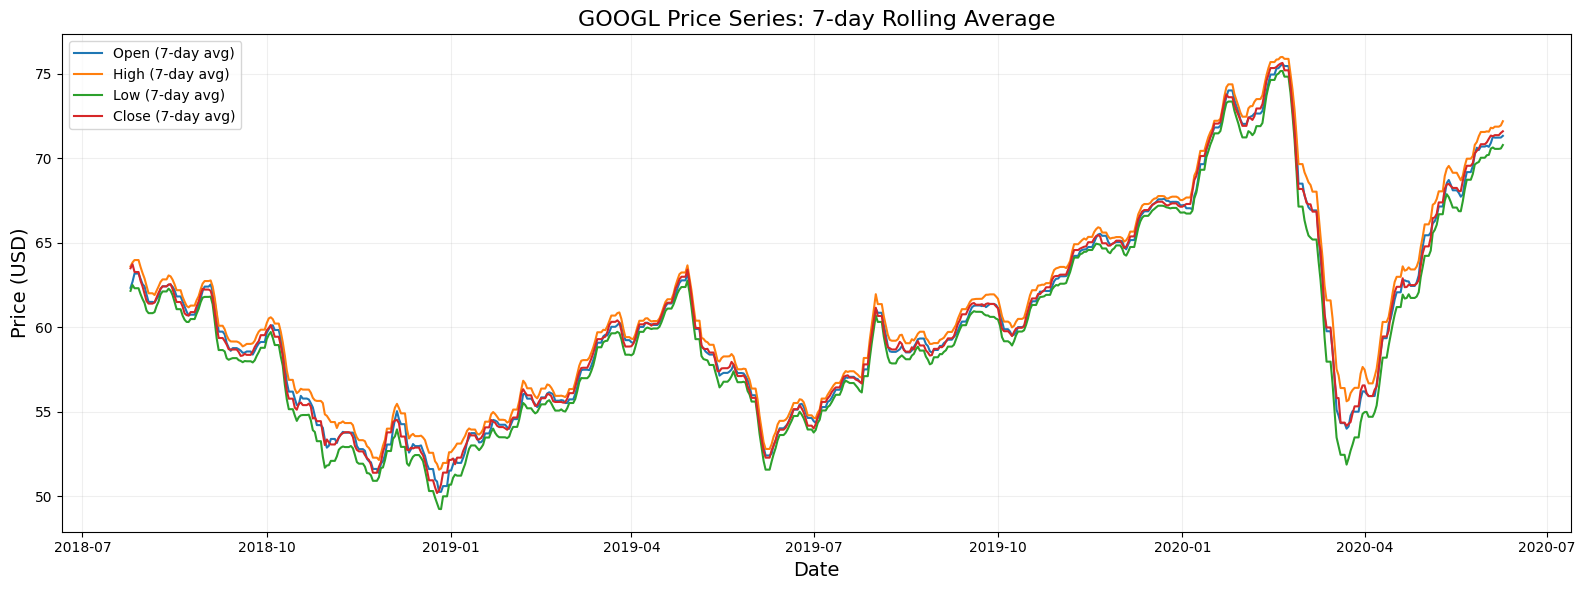

In [16]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_googl, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("GOOGL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [17]:
print(df_googl.columns)
print(df_googl.columns[df_googl.columns.duplicated()])
print(type(df_googl['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',      ''),
            ( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [18]:
df_googl.columns = ['_'.join([str(c) for c in col if c]) for col in df_googl.columns.values]
# Now 'Close_GOOGL', 'High_FXI', ...


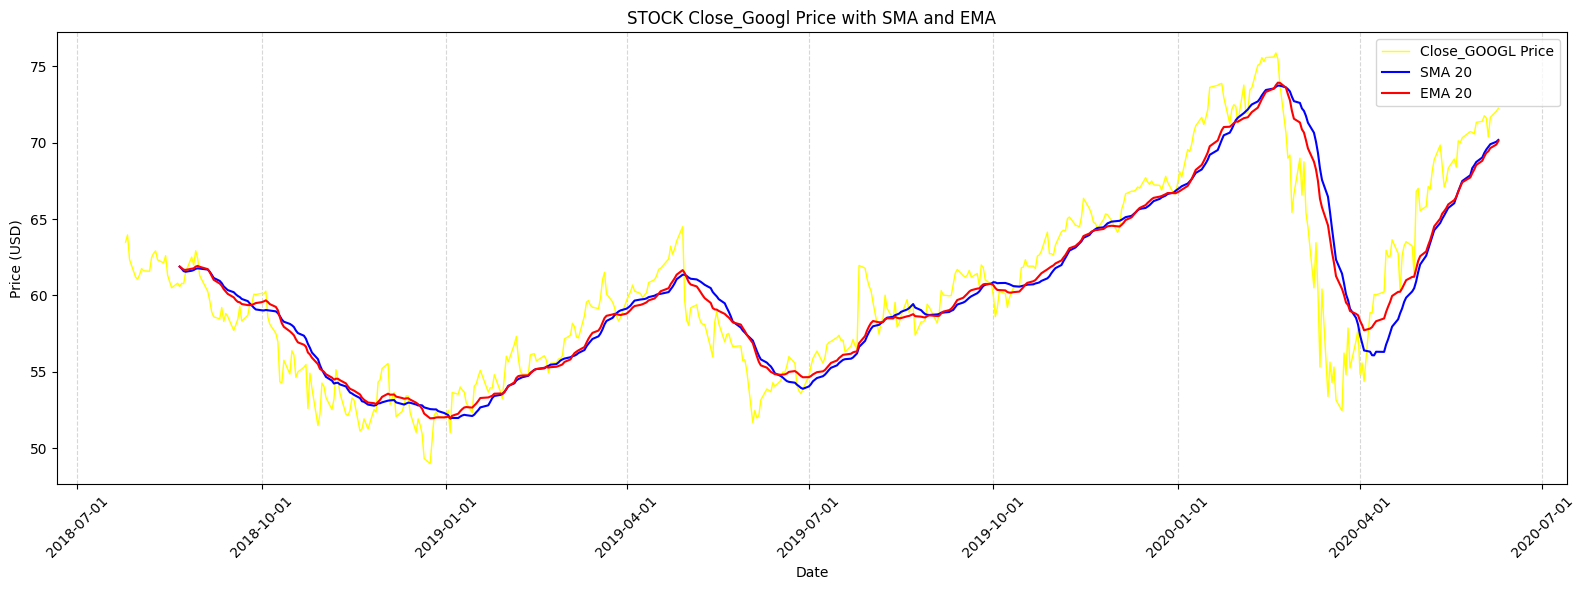

In [19]:
from src.plot_ma import plot_ma
plot_ma(df_googl, 'Close_GOOGL')

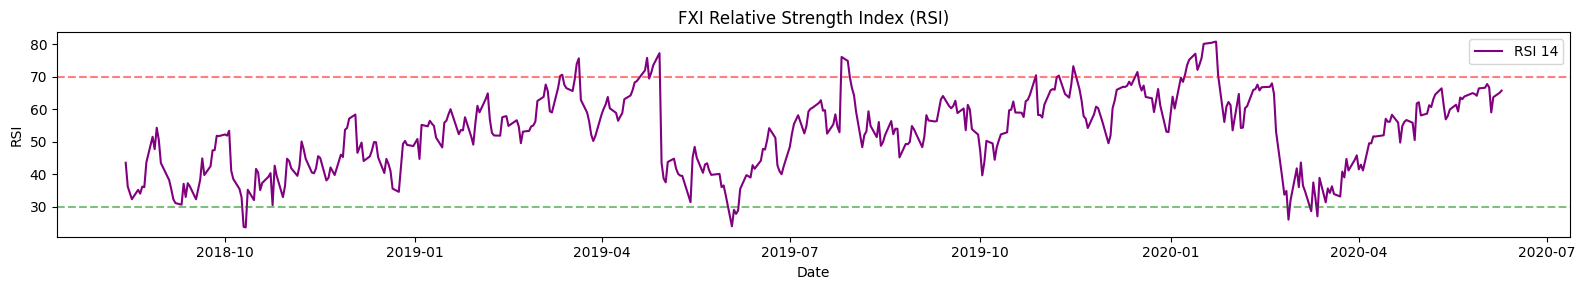

In [20]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_googl, price_col='Close_GOOGL', ticker_name='FXI')

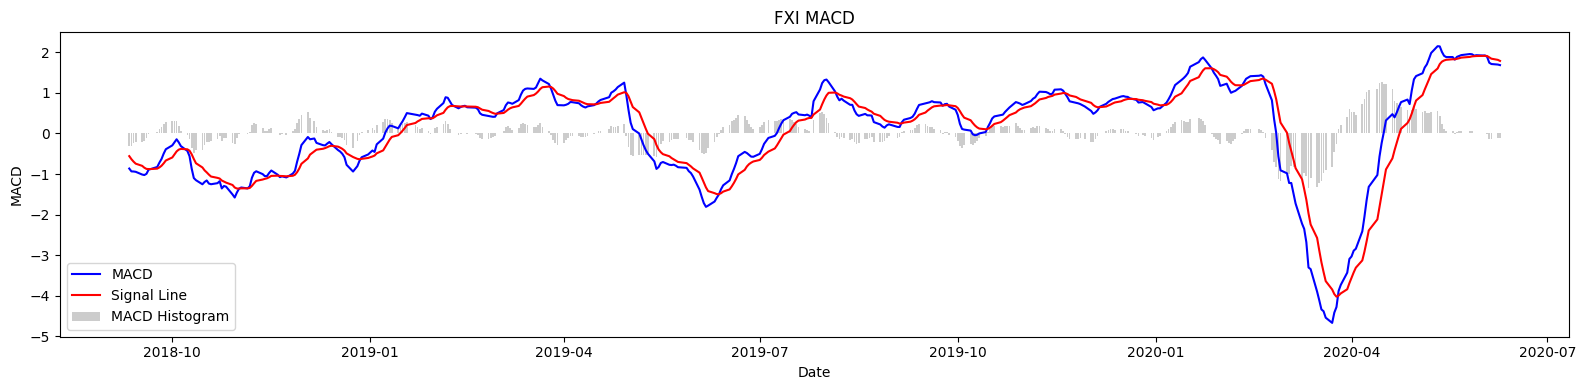

In [21]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_googl, price_col='Close_GOOGL', ticker_name='FXI')